# InceptionV3 Architecture
**Inception V3 by Google is the 3rd version in a series of Deep Learning Convolutional Architectures. Inception V3 was trained using a dataset of 1,000 classes (See the 
list of classes here) from the original ImageNet dataset which was trained with over 1 million training images, the Tensorflow version has 1,001 classes which is due to 
an additional "background' class not used in the original ImageNet. Inception V3 was trained for the ImageNet Large Visual Recognition Challenge where it was a first 
runner up.**

In [1]:
import os
os.listdir('../input/chest-xray-pneumonia/chest_xray/train/')

['PNEUMONIA', 'NORMAL']

In [2]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/val/')

['PNEUMONIA', 'NORMAL']

In [3]:
os.listdir('../input/chest-xray-pneumonia/chest_xray/test/')

['PNEUMONIA', 'NORMAL']

In [4]:
train_dir='../input/chest-xray-pneumonia/chest_xray/train/'
test_dir='../input/chest-xray-pneumonia/chest_xray/test/'
val_dir='../input/chest-xray-pneumonia/chest_xray/val/'

In [5]:
# train 
os.listdir(train_dir)
train_n = train_dir+'NORMAL/'
train_p = train_dir+'PNEUMONIA/'

1341
normal picture title:  NORMAL2-IM-0557-0001.jpeg
pneumonia picture title: person1286_bacteria_3249.jpeg


Text(0.5, 1.0, 'Pneumonia')

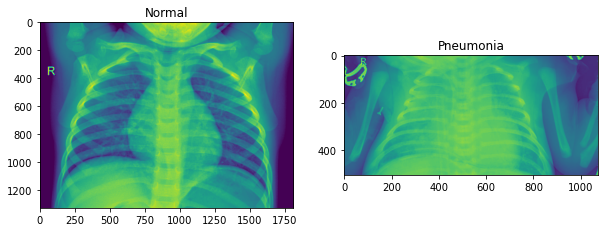

In [7]:
#Normal pic 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

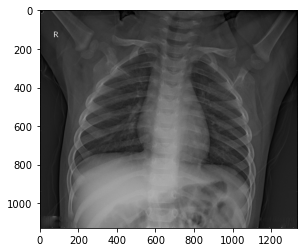

In [8]:
import cv2
import matplotlib.pyplot as plt
for dire in os.listdir(train_dir):
    path = os.path.join(train_dir,dire)
    for img in os.listdir(path):
        paths=os.path.join(path,img)
        
        img_array = cv2.imread(paths,cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        break

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.python.keras.layers import   Dropout, MaxPooling2D, ZeroPadding2D,BatchNormalization

# Image Preprocessing

In [10]:
train_generator_2=ImageDataGenerator(preprocessing_function=preprocess_input,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
training_generator_2=train_generator_2.flow_from_directory(train_dir,target_size=(224,224),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [11]:
val_generator_2=ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator_2=val_generator_2.flow_from_directory(val_dir,target_size=(224,224),batch_size=12,class_mode='binary')

Found 16 images belonging to 2 classes.


# Importing Pretrained InceptionV3 model

In [12]:
from tensorflow.keras.applications import InceptionV3

In [13]:
inception=InceptionV3(input_shape=[224,224,3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


**After Removing the hidden layers, inception model looks like this**

In [14]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Now we need to add the dense layers and the output layers to our model**

In [15]:
#train the layers of the model
for layers in inception.layers[:50]:
    layers.trainable=False

In [16]:
x = Flatten()(inception.output)

In [17]:
prediction = Dense(1, activation='sigmoid')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

**After Adding the dense and output layer, **

In [18]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [19]:
pip install visualkeras

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


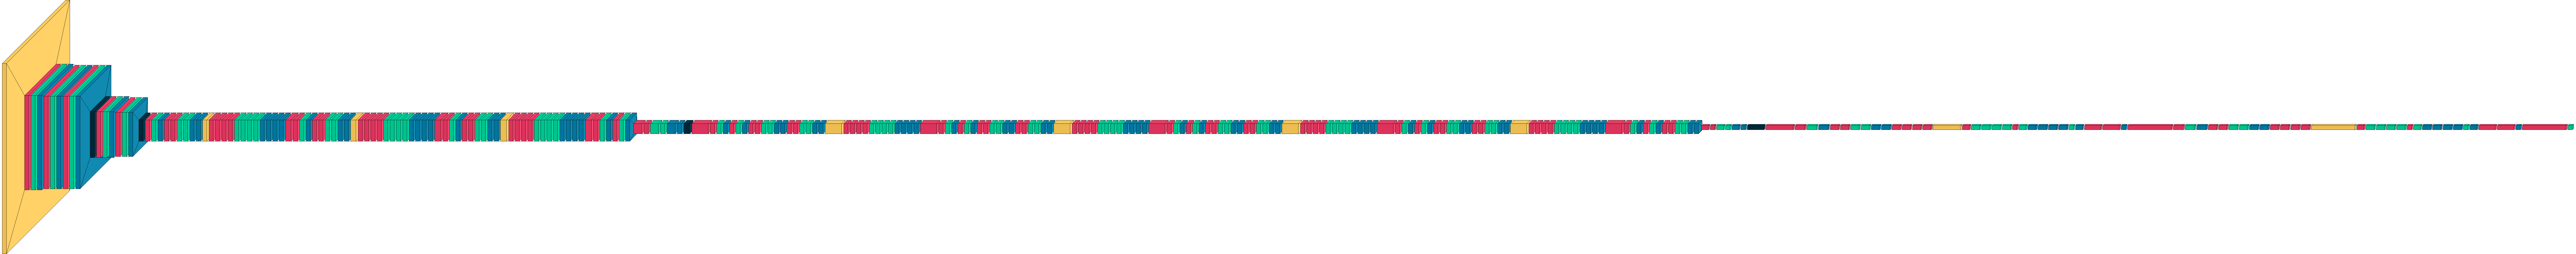

In [20]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [21]:
# let's visualize layer names and layer indices to see how many layers
from keras import layers
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [22]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(lr=0.001, decay=0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
#CallBacks Function
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
early_stop=EarlyStopping(monitor="val_acc",
                         patience=10,
                         mode="auto",)
Learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5,min_lr=0.001)

callbacks=[early_stop,Learning_rate_reduction]

In [24]:
history = model.fit_generator(training_generator_2,validation_data = validation_generator_2,epochs = 20, verbose = 1,callbacks=callbacks)

Epoch 1/20
1304/1304 [==============================] - 177s 135ms/step - loss: 0.6241 - accuracy: 0.8384 - val_loss: 2.0741 - val_accuracy: 0.4375
Epoch 2/20
1304/1304 [==============================] - 128s 98ms/step - loss: 0.2238 - accuracy: 0.9124 - val_loss: 1.3485 - val_accuracy: 0.6250
Epoch 3/20
1304/1304 [==============================] - 129s 99ms/step - loss: 0.1881 - accuracy: 0.9317 - val_loss: 0.8375 - val_accuracy: 0.6875
Epoch 4/20
1304/1304 [==============================] - 128s 99ms/step - loss: 0.1471 - accuracy: 0.9471 - val_loss: 0.8639 - val_accuracy: 0.6875
Epoch 5/20
1304/1304 [==============================] - 127s 98ms/step - loss: 0.1268 - accuracy: 0.9538 - val_loss: 0.3246 - val_accuracy: 0.8125
Epoch 6/20
1304/1304 [==============================] - 128s 98ms/step - loss: 0.1273 - accuracy: 0.9540 - val_loss: 0.7919 - val_accuracy: 0.7500
Epoch 7/20
1304/1304 [==============================] - 127s 98ms/step - loss: 0.1039 - accuracy: 0.9613 - val_loss: 

In [25]:
accuracy_3=history.history['accuracy']
loss_3=history.history['loss']
val_accuracy_3=history.history['val_accuracy']
val_loss_3=history.history['val_loss']

In [26]:
epochs = range(len(accuracy_3))
epochs

range(0, 20)

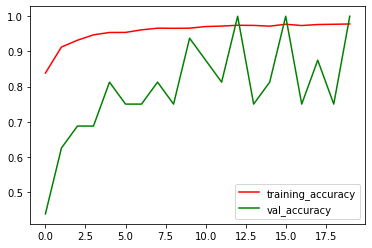

In [27]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy_3,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy_3,'g',label='val_accuracy')
plt.legend()
plt.show()

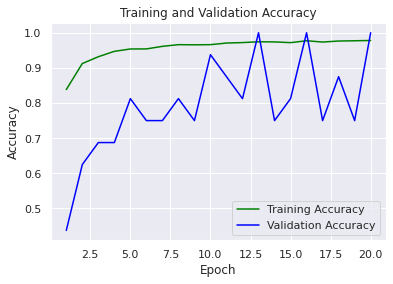

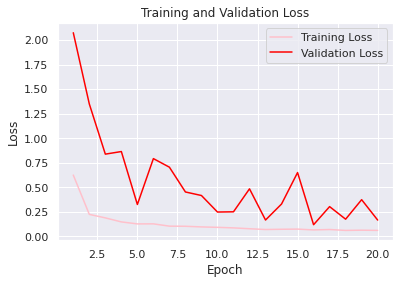

In [28]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
class_dict = training_generator_2.class_indices
print(class_dict)


{'NORMAL': 0, 'PNEUMONIA': 1}


In [30]:
li = list(class_dict.keys())
print(li)

['NORMAL', 'PNEUMONIA']


Following is our prediction:


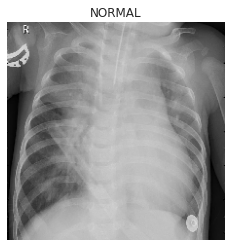

In [31]:
# predicting an image

from keras.preprocessing import image
import numpy as np
image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person96_bacteria_464.jpeg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()